# Importando as bibliotecas

In [1]:
#!pip install shap

In [1]:
#!pip install matplotlib
#!pip install scipy
#!pip install scipy

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader

In [9]:
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl import config_tickers
from finrl.config import INDICATORS

In [10]:
import itertools
import numpy as np

In [11]:
%matplotlib inline

In [12]:
codigos_ibovespa = [
    'ABEV3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3', 'BEEF3', 'BPAC11', 'BRAP4',
    #'VVBR3', 'BTOW3','ENBR3',GNDI3,IGTA3
    'BRFS3', 'BRKM5',  'CCRO3', 'CIEL3', 'CMIG4', 'COGN3', 'CPFE3',
    'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3', 'ECOR3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3',
     'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4',  'GOAU4', 'GOLL4', 'HAPV3',
     'HYPE3', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'LREN3',
    'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'NTCO3', 'PCAR3', 'PETR3', 'PETR4', 'PRIO3', 'QUAL3',
    'RADL3', 'RAIL3', 'RENT3', 'SANB11', 'SBSP3','SUZB3', 'TAEE11', 'TIMS3', 'TOTS3',
    'UGPA3', 'USIM5', 'VALE3', 'VIVT3', 'WEGE3', 'WIZC3','YDUQ3','SOMA3','MDIA3'
]

# Importando os dados

In [13]:
codigos_ibovespa = [
    'ABEV3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBSE3', 'BEEF3', 'BPAC11', 'BRAP4',
    #'VVBR3', 'BTOW3','ENBR3',GNDI3,IGTA3
    'BRFS3', 'BRKM5',  'CCRO3', 'CIEL3', 'CMIG4', 'COGN3', 'CPFE3',
    'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3', 'ECOR3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3',
     'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4',  'GOAU4', 'GOLL4', 'HAPV3',
     'HYPE3', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'LREN3',
    'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'NTCO3', 'PCAR3', 'PETR3', 'PETR4', 'PRIO3', 'QUAL3',
    'RADL3', 'RAIL3', 'RENT3', 'SANB11', 'SBSP3','SUZB3', 'TAEE11', 'TIMS3', 'TOTS3',
    'UGPA3', 'USIM5', 'VALE3', 'VIVT3', 'WEGE3', 'WIZC3','YDUQ3','SOMA3','MDIA3'
]

In [14]:
def converter_valor(valor):
    if valor.endswith('B'):
        return float(valor.replace('B', '').replace(' ', '')) * 1_000
    elif valor.endswith('M'):
        return float(valor.replace('M', '').replace(' ', '')) * 1
    elif valor.endswith('K'):
        return float(valor.replace('K', '').replace(' ', '')) * 0.001
    elif valor == 'NA':
        return float('nan')

## Pegando indicadores

In [15]:
df_dre = pd.read_csv('C:/Users/jefer/Documents/Aprendizado_reforco_trading/Finrl/Finrl_fundamentalist_trader/Fundamentalistas_investsite/dre_trimestral.csv').iloc[:,1:].drop_duplicates()
df_precos_relativos = pd.read_csv('C:/Users/jefer/Documents/Aprendizado_reforco_trading/Finrl/Finrl_fundamentalist_trader/Fundamentalistas_investsite/precos_relativos_trimestrais.csv').iloc[:,1:].drop_duplicates()

#df_fluxo_experimental = pd.read_csv('fluxo_experimental.csv').iloc[:,1:].drop_duplicates()
# Supondo que df_fluxo_experimental é o nome do seu DataFrame
#df_fluxo_experimental.rename(columns={'datas': 'data'}, inplace=True)

df_resumo_balanco = pd.read_csv('C:/Users/jefer/Documents/Aprendizado_reforco_trading/Finrl/Finrl_fundamentalist_trader/Fundamentalistas_investsite/resumo_balanco.csv').iloc[:,1:].drop_duplicates()
# Supondo que df_resumo_balancol é o nome do seu DataFrame
df_resumo_balanco.rename(columns={'datas': 'data'}, inplace=True)

df_margens = pd.read_csv('C:/Users/jefer/Documents/Aprendizado_reforco_trading/Finrl/Finrl_fundamentalist_trader/Fundamentalistas_investsite/margens.csv').iloc[:,1:].drop_duplicates()
df_margens.rename(columns={'datas': 'data'}, inplace=True)

In [16]:
print('dre_trimestral',len(df_dre.tic.unique()))
print('precos_relativos_trimestrais',len(df_precos_relativos.tic.unique()))
#print('fluxo_experimental',len(df_fluxo_experimental.tic.unique()))
print('resumo_balanco',len(df_resumo_balanco.tic.unique()))
print('margens',len(df_margens.tic.unique()))

dre_trimestral 70
precos_relativos_trimestrais 70
resumo_balanco 70
margens 70


**Ordenando os dados**

In [17]:
df_dre = df_dre.sort_values(by=['data', 'tic'])
df_precos_relativos = df_precos_relativos.sort_values(by=['data', 'tic'])
#df_fluxo_experimental = df_fluxo_experimental.sort_values(by=['data', 'tic'])
df_resumo_balanco = df_resumo_balanco.sort_values(by=['data', 'tic'])
df_margens = df_margens.sort_values(by=['data', 'tic'])

**Selecionando ações com um minumo de 50 ocorrencias e convertando as datas**

In [18]:
# Contagem de valores na coluna 'tic'
counts = df_dre['tic'].value_counts()

# Filtrar linhas onde o valor na coluna 'tic' ocorre 12 vezes ou mais
df_dre = df_dre[df_dre['tic'].isin(counts[counts >= 12].index)]

#Transformar as datas
df_dre['data'] = pd.to_datetime(df_dre['data'])
df_dre['data'] = df_dre['data'].dt.strftime('%Y-%m-%d')

# Visualizar o DataFrame resultante
print('Sobrou um total de:',len(df_dre.tic.unique()),'ações.''Tamanho:', df_dre.shape)

df_dre.head()

Sobrou um total de: 70 ações.Tamanho: (5203, 9)


,data,receita_liquida,resultado_bruto,ebit,depreciacao_amortizacao,ebitida,lucro_liquido,lucro_por_acao,tic
669,2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRAP4
317,2000-03-31,3310.00,1550.00,NaN,NaN,NaN,642.20,NaN,BBDC3
411,2000-03-31,3310.00,1550.00,NaN,NaN,NaN,642.20,NaN,BBDC4
668,2000-03-31,NaN,NaN,3.91,NaN,NaN,3.91,0.00,BRAP4
762,2000-03-31,399.82,89.48,17.26,NaN,NaN,7.25,0.00,BRFS3


In [19]:
# Contagem de valores na coluna 'tic'
counts_precos_realativos = df_precos_relativos['tic'].value_counts()

# Filtrar linhas onde o valor na coluna 'tic' ocorre 12 vezes ou mais
df_precos_relativos = df_precos_relativos[df_precos_relativos['tic'].isin(counts_precos_realativos[counts_precos_realativos >= 12].index)]

# transformar data
df_precos_relativos['data'] = pd.to_datetime(df_precos_relativos['data'], format='%d/%m/%Y')
df_precos_relativos['data'] = df_precos_relativos['data'].dt.strftime('%Y-%m-%d')

# Visualizar o DataFrame resultante
print('Sobrou um total de:',len(df_precos_relativos.tic.unique()),'ações.''Tamanho:', df_precos_relativos.shape)

df_precos_relativos.head()

Sobrou um total de: 70 ações.Tamanho: (5203, 20)


,data,preco_lucro,preco_vpa,preco_receita_liquida,preco_fco,preco_fcf,preco_ativo_total,preco_ebit,preco_capital_giro,preco_ncav,ev_ebit,ev_ebitda,ev_receita_liquida,ev_fco,ev_fcf,ev_atito_total,market_cap_empresa,enterprise_value,dividend_yield,tic
669,2000-02-29,0.00,1.53,0.0,NaN,NaN,0.25,0.00,-15.80,-0.29,0.00,NaN,0.0,NaN,NaN,0.73,1440.0,4420.0,0.00,BRAP4
1395,2005-04-30,1.035.53,23.21,9.32,NaN,NaN,6.51,128.32,57.75,-10.71,134.09,NaN,9.74,NaN,NaN,6.80,17710.0,18510.0,0.00,CSAN3
1391,2006-04-30,-147.34,7.02,3.84,NaN,NaN,1.68,52.36,6.44,-3.36,59.49,NaN,4.36,NaN,NaN,1.91,9510.0,10810.0,0.00,CSAN3
1387,2007-04-30,19.41,4.25,1.92,NaN,NaN,1.11,16.94,4.25,-2.31,21.09,NaN,2.39,NaN,NaN,1.38,6940.0,8630.0,0.00,CSAN3
1383,2008-04-30,-178.10,2.56,3.11,NaN,NaN,1.15,-24.09,4.99,-3.60,-27.66,NaN,3.57,NaN,NaN,1.32,8510.0,9770.0,0.00,CSAN3


In [20]:
"""# Contagem de valores na coluna 'tic'
counts = df_fluxo_experimental['tic'].value_counts()

# Filtrar linhas onde o valor na coluna 'tic' ocorre 50 vezes ou mais
df_fluxo_experimental = df_fluxo_experimental[df_fluxo_experimental['tic'].isin(counts[counts >= 50].index)]

#Transformar as datas
df_fluxo_experimental['data'] = pd.to_datetime(df_fluxo_experimental['data'], format='%d/%m/%Y')
df_fluxo_experimental['data'] = df_fluxo_experimental['data'].dt.strftime('%Y-%m-%d')

# Visualizar o DataFrame resultante
print('Sobrou um total de:',len(df_fluxo_experimental.tic.unique()),'ações.''Tamanho:', df_fluxo_experimental.shape)

df_fluxo_experimental.head()"""

"# Contagem de valores na coluna 'tic'\ncounts = df_fluxo_experimental['tic'].value_counts()\n\n# Filtrar linhas onde o valor na coluna 'tic' ocorre 50 vezes ou mais\ndf_fluxo_experimental = df_fluxo_experimental[df_fluxo_experimental['tic'].isin(counts[counts >= 50].index)]\n\n#Transformar as datas\ndf_fluxo_experimental['data'] = pd.to_datetime(df_fluxo_experimental['data'], format='%d/%m/%Y')\ndf_fluxo_experimental['data'] = df_fluxo_experimental['data'].dt.strftime('%Y-%m-%d')\n\n# Visualizar o DataFrame resultante\nprint('Sobrou um total de:',len(df_fluxo_experimental.tic.unique()),'ações.''Tamanho:', df_fluxo_experimental.shape)\n\ndf_fluxo_experimental.head()"

In [21]:
# Contagem de valores na coluna 'tic'
counts = df_resumo_balanco['tic'].value_counts()

# Filtrar linhas onde o valor na coluna 'tic' ocorre 12 vezes ou mais
df_resumo_balanco = df_resumo_balanco[df_resumo_balanco['tic'].isin(counts[counts >= 12].index)]

#Transformar as datas
df_resumo_balanco['data'] = pd.to_datetime(df_resumo_balanco['data'])
df_resumo_balanco['data'] = df_resumo_balanco['data'].dt.strftime('%Y-%m-%d')

# Visualizar o DataFrame resultante
print('Sobrou um total de:',len(df_resumo_balanco.tic.unique()),'ações.''Tamanho:', df_resumo_balanco.shape)

df_resumo_balanco.head()

Sobrou um total de: 70 ações.Tamanho: (5203, 13)


C:\Users\jefer\AppData\Local\Temp\ipykernel_15724\3456095083.py:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_resumo_balanco['data'] = pd.to_datetime(df_resumo_balanco['data'])


,data,caixa_equivalentes_caixa,ativo_total,divida_curto_prazo,divida_longo_razo,divida_bruta,divida_liquida,patrimonio_liquido,valor_patrimonial_acao,acoes_ordinarias,acoes_preferenciais,total_acoes,tic
669,2000-02-29,632.02,6070.0,879.76,2740.00,3620.00,2.99 B,993.22,0.00,554.722.817.000,535.892.517.000,1.090.615.334.000,BRAP4
1395,2005-04-30,39.98,2720.0,38.14,798.44,836.57,796.59 M,762.88,2.40,318.520.000,0,318.520.000,CSAN3
1391,2006-04-30,831.52,5660.0,68.78,2060.00,2130.00,1.30 B,1360.00,21.66,62.584.000,0,62.584.000,CSAN3
1387,2007-04-30,1220.00,6260.0,88.99,2830.00,2910.00,1.70 B,1630.00,8.63,188.886.000,0,188.886.000,CSAN3
1383,2008-04-30,1010.00,7390.0,83.34,2190.00,2270.00,1.26 B,3330.00,12.20,272.548.000,0,272.548.000,CSAN3


In [22]:
# Contagem de valores na coluna 'tic'
counts = df_margens['tic'].value_counts()

# Filtrar linhas onde o valor na coluna 'tic' ocorre 12 vezes ou mais
df_margens = df_margens[df_margens['tic'].isin(counts[counts >= 12].index)]

#Transformar as datas
df_margens['data'] = pd.to_datetime(df_margens['data'])
df_margens['data'] = df_margens['data'].dt.strftime('%Y-%m-%d')

# Visualizar o DataFrame resultante
print('Sobrou um total de:',len(df_margens.tic.unique()),'ações.''Tamanho:', df_margens.shape)

df_margens.head()

Sobrou um total de: 70 ações.Tamanho: (5203, 16)


C:\Users\jefer\AppData\Local\Temp\ipykernel_15724\2987048103.py:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_margens['data'] = pd.to_datetime(df_margens['data'])


,data,retorno_sobre_capital_tangivel_inicial,retorno_sobre_capital_investido_inicial,retorno_sobre_capital_tangivel_inicial_pre_impostos,retorno_sobre_capital_investido_inicial_pre_impostos,retorno_sobre_patrimonio_liquido_inicial,retorno_sobre_ativo_inicial,margem_bruta,margem_liquida,margem_ebit,margem_ebitda,giro_do_ativo_inicial,alavancagem_financeira,passivo_patrimonio_liquido,divida_liquida_ebitda,tic
669,2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,NaN,NaN,6.11,5.11,NaN,BRAP4
1395,2005-04-30,NaN,NaN,NaN,NaN,NaN,NaN,0.2956,0.0090,0.0726,NaN,NaN,3.57,2.57,NaN,CSAN3
1391,2006-04-30,0.0539,0.0769,0.0816,0.1165,-0.0846,-0.0237,0.3053,-0.0261,0.0733,NaN,0.91,4.18,3.18,NaN,CSAN3
1387,2007-04-30,0.0639,0.1019,0.0968,0.1544,0.2636,0.0631,0.3118,0.0991,0.1135,NaN,0.64,3.84,2.84,NaN,CSAN3
1383,2008-04-30,-0.0513,-0.0701,-0.0778,-0.1061,-0.0293,-0.0076,0.1276,-0.0175,-0.1291,NaN,0.44,2.22,1.22,NaN,CSAN3


**Mudando os dados total_acoes**

In [23]:
# Remover os pontos de separação de milhares e converter para int
df_resumo_balanco['total_acoes'] = df_resumo_balanco['total_acoes'].str.replace('.', '').astype(float)
df_resumo_balanco['acoes_ordinarias'] = df_resumo_balanco['acoes_ordinarias'].str.replace('.', '').astype(float)
df_resumo_balanco['acoes_preferenciais'] = df_resumo_balanco['acoes_preferenciais'].str.replace('.', '').astype(float)

**Juntando os dados**

In [24]:
df_juntos = (df_dre.merge(df_precos_relativos, on=['data','tic']).merge(df_resumo_balanco, on=['data','tic']).merge(df_margens, on=['data','tic'])).drop_duplicates()#.merge(df_fluxo_experimental, on=['data','tic']).drop_duplicates()

**Apagando BBDC4**

In [25]:
#df_juntos = df_juntos[df_juntos.tic !='BBDC4']

**Setando os index com data e tic**

In [34]:
df_juntos_index = df_juntos.set_index(['data','tic'])

In [35]:
df_juntos_index.head()

receita_liquida  resultado_bruto   ebit  \
data       tic                                              
2000-02-29 BRAP4              NaN              NaN    NaN   
2000-03-31 BBDC3          3310.00          1550.00    NaN   
           BBDC4          3310.00          1550.00    NaN   
           BRAP4              NaN              NaN   3.91   
           BRFS3           399.82            89.48  17.26   

                  depreciacao_amortizacao  ebitida  lucro_liquido  \
data       tic                                                      
2000-02-29 BRAP4                      NaN      NaN            NaN   
2000-03-31 BBDC3                      NaN      NaN         642.20   
           BBDC4                      NaN      NaN         642.20   
           BRAP4                      NaN      NaN           3.91   
           BRFS3                      NaN      NaN           7.25   

                 lucro_por_acao preco_lucro  preco_vpa preco_receita_liquida  \
data       tic                                                                 
2000-02-29 BRAP4            NaN        0.00       1.53                   0.0   
2000-03-31 BBDC3            NaN        7.47       1.65                  0.69   
           BBDC4            NaN        9.66       2.14                   0.9   
           BRAP4           0.00      387.61       1.52                   0.0   
           BRFS3           0.00  148.202.89  16.811.78              5.529.26   

                  ... retorno_sobre_patrimonio_liquido_inicial  \
data       tic    ...                                            
2000-02-29 BRAP4  ...                                      NaN   
2000-03-31 BBDC3  ...                                   0.2207   
           BBDC4  ...                                   0.2207   
           BRAP4  ...                                   0.0039   
           BRFS3  ...                                   0.1243   

                 retorno_sobre_ativo_inicial margem_bruta margem_liquida  \
data       tic                                                             
2000-02-29 BRAP4                         NaN       0.0000         0.0000   
2000-03-31 BBDC3                      0.0203       0.3417         0.0929   
           BBDC4                      0.0203       0.3417         0.0929   
           BRAP4                      0.0039       0.0000         0.0000   
           BRFS3                      0.0378       0.2653         0.0373   

                 margem_ebit margem_ebitda giro_do_ativo_inicial  \
data       tic                                                     
2000-02-29 BRAP4      0.0000           NaN                   NaN   
2000-03-31 BBDC3         NaN           NaN                  0.22   
           BBDC4         NaN           NaN                  0.22   
           BRAP4      0.0000           NaN                  0.00   
           BRFS3      0.0744           NaN                  1.01   

                 alavancagem_financeira passivo_patrimonio_liquido  \
data       tic                                                       
2000-02-29 BRAP4                   6.11                       5.11   
2000-03-31 BBDC3                  11.85                      10.85   
           BBDC4                  11.85                      10.85   
           BRAP4                   1.00                       0.00   
           BRFS3                   3.59                       2.59   

                 divida_liquida_ebitda  
data       tic                          
2000-02-29 BRAP4                   NaN  
2000-03-31 BBDC3                   NaN  
           BBDC4                   NaN  
           BRAP4                   NaN  
           BRFS3                   NaN  

[5 rows x 50 columns]

# Pegando dados do mercado

In [28]:
lista_acoes = []
for i in df_juntos.tic.unique():
    data_min = df_juntos[df_juntos.tic == i]['data'].min()
    data_max = df_juntos[df_juntos.tic == i]['data'].max()
    lista_acoes.append(YahooDownloader(start_date =data_min,end_date = data_max, ticker_list =[i+'.SA']).fetch_data())

[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (5925, 8)
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (5902, 8)
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (3910, 8)
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (4516, 8)
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (5902, 8)
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (5902, 8)
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (2869, 8)
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (5902, 8)
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (5823, 8)
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (4877, 8)


In [29]:
df_ibovespa = pd.concat(lista_acoes)
#df_ibovespa['date'] = pd.to_datetime(df_ibovespa['date'],format='%Y-%m-%d')
df_ibovespa['tic'] = df_ibovespa["tic"].apply(lambda x: x.replace('.SA',''))

In [30]:
df_ibovespa.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2000-02-29,3.25,3.5,3.25,1.169345,3784000000,BRAP4,1
1,2000-03-01,3.25,3.5,3.25,1.259295,5796000000,BRAP4,2
2,2000-03-02,3.50,3.5,3.50,1.259295,5696000000,BRAP4,3
3,2000-03-03,3.50,3.5,3.50,1.259295,3712000000,BRAP4,4
4,2000-03-06,3.50,3.5,3.50,1.259295,0,BRAP4,0


**Mudando coluna para**

In [31]:
df_ibovespa['data'] = pd.to_datetime(df_ibovespa['date'],format='%Y-%m-%d')
df_ibovespa.drop('date',axis=1,inplace=True)

# Tratando os dados

**Arrumando a coluna divida_liquida**

In [36]:
df_juntos_index['divida_liquida'] =  df_juntos_index['divida_liquida'].astype(str).apply(converter_valor).astype(float)

**Substituindo valores faltantes**

In [50]:
df_juntos_index = df_juntos_index.fillna(method='ffill').fillna(method='bfill')

In [51]:
df_juntos_index

receita_liquida  resultado_bruto      ebit  \
data       tic                                                 
2000-02-29 BRAP4          3310.00          1550.00      3.91   
2000-03-31 BBDC3          3310.00          1550.00      3.91   
           BBDC4          3310.00          1550.00      3.91   
           BRAP4          3310.00          1550.00      3.91   
           BRFS3           399.82            89.48     17.26   
...                           ...              ...       ...   
2023-09-30 VALE3         51960.00         21110.00  16500.00   
           VIVT3         13110.00          5660.00   2120.00   
           WEGE3          8070.00          2610.00   1580.00   
           WIZC3           287.62           175.81    131.70   
           YDUQ3          1300.00           789.42    258.40   

                  depreciacao_amortizacao   ebitida  lucro_liquido  \
data       tic                                                       
2000-02-29 BRAP4                     0.00      0.00         642.20   
2000-03-31 BBDC3                     0.00      0.00         642.20   
           BBDC4                     0.00      0.00         642.20   
           BRAP4                     0.00      0.00           3.91   
           BRFS3                     0.00      0.00           7.25   
...                                   ...       ...            ...   
2023-09-30 VALE3                 -3810.00  20310.00       13860.00   
           VIVT3                 -3420.00   5540.00        1470.00   
           WEGE3                  -157.60   1740.00        1310.00   
           WIZC3                   -27.59    159.28          44.51   
           YDUQ3                  -194.94    453.35          92.52   

                 lucro_por_acao preco_lucro  preco_vpa preco_receita_liquida  \
data       tic                                                                 
2000-02-29 BRAP4           0.00        0.00       1.53                   0.0   
2000-03-31 BBDC3           0.00        7.47       1.65                  0.69   
           BBDC4           0.00        9.66       2.14                   0.9   
           BRAP4           0.00      387.61       1.52                   0.0   
           BRFS3           0.00  148.202.89  16.811.78              5.529.26   
...                         ...         ...        ...                   ...   
2023-09-30 VALE3           3.05        6.24       1.56                  1.44   
           VIVT3           0.88       16.52       1.09                  1.47   
           WEGE3           0.31       25.50       8.19                  4.14   
           WIZC3           0.28        9.13       1.93                  0.85   
           YDUQ3           0.30       32.79       1.90                  1.23   

                  ... retorno_sobre_patrimonio_liquido_inicial  \
data       tic    ...                                            
2000-02-29 BRAP4  ...                                   0.2207   
2000-03-31 BBDC3  ...                                   0.2207   
           BBDC4  ...                                   0.2207   
           BRAP4  ...                                   0.0039   
           BRFS3  ...                                   0.1243   
...               ...                                      ...   
2023-09-30 VALE3  ...                                   0.2647   
           VIVT3  ...                                   0.0659   
           WEGE3  ...                                   0.3728   
           WIZC3  ...                                   0.2238   
           YDUQ3  ...                                   0.0622   

                 retorno_sobre_ativo_inicial margem_bruta margem_liquida  \
data       tic                                                             
2000-02-29 BRAP4                      0.0203       0.0000         0.0000   
2000-03-31 BBDC3                      0.0203       0.3417         0.0929   
           BBDC4                      0.0203       0.3417         0.09

**Transformando as colunas em numericas**

In [52]:
def limpar_numerico(valor):
    if isinstance(valor, str):
        valor = valor.replace('.', '')  # Remover pontos
        if 'mil' in valor:
            valor = valor.replace('mil', '')  # Remover 'mil'
            valor = float(valor)   # Converter para float
        else:
            valor = float(valor)  # Se não contiver 'mil', apenas converter
    return valor

In [53]:
colunas = df_juntos_index.columns

for col in df_juntos_index.columns:
    df_juntos_index[col] = df_juntos_index[col].replace(' ', '', regex=True)  # Remove espaços em branco
    df_juntos_index[col] = df_juntos_index[col].astype(float, errors='ignore') 


In [54]:
for col in df_juntos_index.columns[3:]:
    df_juntos_index[col] = df_juntos_index[col].apply(limpar_numerico)/100

In [55]:
df_juntos_index

receita_liquida  resultado_bruto      ebit  \
data       tic                                                 
2000-02-29 BRAP4          3310.00          1550.00      3.91   
2000-03-31 BBDC3          3310.00          1550.00      3.91   
           BBDC4          3310.00          1550.00      3.91   
           BRAP4          3310.00          1550.00      3.91   
           BRFS3           399.82            89.48     17.26   
...                           ...              ...       ...   
2023-09-30 VALE3         51960.00         21110.00  16500.00   
           VIVT3         13110.00          5660.00   2120.00   
           WEGE3          8070.00          2610.00   1580.00   
           WIZC3           287.62           175.81    131.70   
           YDUQ3          1300.00           789.42    258.40   

                  depreciacao_amortizacao   ebitida  lucro_liquido  \
data       tic                                                       
2000-02-29 BRAP4                   0.0000    0.0000         6.4220   
2000-03-31 BBDC3                   0.0000    0.0000         6.4220   
           BBDC4                   0.0000    0.0000         6.4220   
           BRAP4                   0.0000    0.0000         0.0391   
           BRFS3                   0.0000    0.0000         0.0725   
...                                   ...       ...            ...   
2023-09-30 VALE3                 -38.1000  203.1000       138.6000   
           VIVT3                 -34.2000   55.4000        14.7000   
           WEGE3                  -1.5760   17.4000        13.1000   
           WIZC3                  -0.2759    1.5928         0.4451   
           YDUQ3                  -1.9494    4.5335         0.9252   

                  lucro_por_acao  preco_lucro  preco_vpa  \
data       tic                                             
2000-02-29 BRAP4            0.00         0.00       1.53   
2000-03-31 BBDC3            0.00         7.47       1.65   
           BBDC4            0.00         9.66       2.14   
           BRAP4            0.00       387.61       1.52   
           BRFS3            0.00    148202.89   16811.78   
...                          ...          ...        ...   
2023-09-30 VALE3            3.05         6.24       1.56   
           VIVT3            0.88        16.52       1.09   
           WEGE3            0.31        25.50       8.19   
           WIZC3            0.28         9.13       1.93   
           YDUQ3            0.30        32.79       1.90   

                  preco_receita_liquida  ...  \
data       tic                           ...   
2000-02-29 BRAP4                   0.00  ...   
2000-03-31 BBDC3                   0.69  ...   
           BBDC4                   0.09  ...   
           BRAP4                   0.00  ...   
           BRFS3                5529.26  ...   
...                                 ...  ...   
2023-09-30 VALE3                   1.44  ...   
           VIVT3                   1.47  ...   
           WEGE3                   4.14  ...   
           WIZC3                   0.85  ...   
           YDUQ3                   1.23  ...   

                  retorno_sobre_patrimonio_liquido_inicial  \
data       tic                                               
2000-02-29 BRAP4                                  0.002207   
2000-03-31 BBDC3                                  0.002207   
           BBDC4                                  0.002207   
           BRAP4                                  0.000039   
           BRFS3                                  0.001243   
...                                                    ...   
2023-09-30 VALE3                                  0.002647   
           VIVT3                                  0.000659   
           WEGE3                                  0.003728   
           WIZC3                                  0.002238   
           YDUQ3                                  0.000622   

                  retorno_sobre_ativo_inicial  margem_bruta  

**Criando categorizacao para o market cap**

In [78]:
# Função para categorizar os valores por linha
# Função para categorizar os valores
def categorize_value(val):
    if val <= 15 :
        return 0
    elif val > 15 and val <= 30:
        return 1
    elif val > 30 and val <= 40:
        return 2
    elif val > 40 and val <= 50:
        return 3
    else:
        return 4

In [84]:
df_juntos_index['market_cap_empresa_categoria'] = df_juntos_index['market_cap_empresa'].unstack('tic').fillna(method='bfill').rank(axis=1, ascending=True).applymap(categorize_value).stack()

# Juntando dados de indicadores e dados do ibovespa

Os datas sao diferentes, entao subistituimos os valores entre os os intervalos com os valores anteriores

In [85]:
list_ticker = df_ibovespa["tic"].unique().tolist()
list_date = list(pd.date_range(df_ibovespa['data'].min(),df_ibovespa['data'].max()))
combination = list(itertools.product(list_date,list_ticker))

# Merge stock price data and ratios into one dataframe
data_completo = pd.DataFrame(combination,columns=["data","tic"]).merge(df_ibovespa,on=["data","tic"],how="left")
df_juntos_index = df_juntos_index.reset_index()
df_juntos_index['data'] = pd.to_datetime(df_juntos_index['data'],format='%Y-%m-%d')
data_completo = data_completo.merge(df_juntos_index,how='left',on=['data','tic'])
data_completo = data_completo.sort_values(['tic','data'])

# Backfill the ratio data to make them daily
data_completo = data_completo.fillna(method='ffill').bfill(axis='rows')

# Criando indicadores

**Analisando colunas com muitos 0:**

In [86]:
list_nome=[]
lista_zero = []
for i in data_completo.columns[2:]:
    list_nome.append(i)
    lista_zero.append(len(data_completo[data_completo[i]== 0])/len(data_completo[i]))
df_zeros = pd.DataFrame({'colunas':list_nome,
                        'porcentagem_zero':lista_zero}).sort_values(by='porcentagem_zero',ascending=False)

In [87]:
df_zeros.head(10)

,colunas,porcentagem_zero
40,acoes_preferenciais,0.565264
9,depreciacao_amortizacao,0.299196
10,ebitida,0.299196
30,dividend_yield,0.209810
56,market_cap_empresa_categoria,0.189134
5,day,0.100973
12,lucro_por_acao,0.067332
4,volume,0.054625
15,preco_receita_liquida,0.041869
49,margem_liquida,0.041116


In [88]:
##Eliminando colunas com mais de 40 porcento de valores 0
colunas_drop = df_zeros[df_zeros.porcentagem_zero >= 0.40].colunas.values
colunas_drop

array(['acoes_preferenciais'], dtype=object)

In [89]:
data_completo.drop(colunas_drop,axis=1,inplace=True)

**Preco lucro diario**

In [90]:
data_completo['lucro_por_acao'] = data_completo['lucro_por_acao'].apply(limpar_numerico).astype(float)/100

In [91]:
data_completo['pe_diario'] = (data_completo['close']/data_completo['lucro_por_acao']).fillna(0)

**Preco resultado bruto diario**

In [92]:
data_completo['preco_resultado_bruto'] = data_completo['close']/(data_completo['resultado_bruto']/(data_completo['total_acoes']/1000000))

**Preco ebit diario**

In [93]:
data_completo['preco_ebit_diario'] = data_completo['close']/(data_completo['ebit']/(data_completo['total_acoes']/1000000))

**Preco ativo total diario**

In [94]:
data_completo['preco_ativo_total_diario'] = data_completo['close']/(data_completo['ativo_total']/(data_completo['total_acoes']/1000000))

**Preco fluxo de caixa operacional**

In [95]:
#data_completo['preco_fluxo_operacional_diario'] = data_completo['close']/(data_completo['fluxo_caixa_operacional']/(data_completo['total_acoes']/1000000))

**Preco fluxo de caixa de investimento**

In [96]:
#data_completo['preco_fluxo_investimentos_diario'] = data_completo['close']/(data_completo['fluxo_caixa_investimentos']/(data_completo['total_acoes']/1000000))

**Preco divida total diaria**

In [97]:
data_completo['preco_divida_bruta_diaria'] = data_completo['close']/(data_completo['divida_bruta']/(data_completo['total_acoes']/1000000))

**Preco divida liquida diaria**

In [98]:
data_completo['preco_divida_liquida_diaria'] = data_completo['close']/(data_completo['divida_liquida']/(data_completo['total_acoes']/1000000))

**Preco valor patrimonial acao diaria**

In [99]:
data_completo['preco_valor_patrimonial_diaria'] = data_completo['close']/data_completo['valor_patrimonial_acao']

**Relacao acoes ordinarias e preferenciais**

In [100]:
data_completo['porcentagem_acoes_ordinarias'] = data_completo['acoes_ordinarias']/data_completo['total_acoes']

# Apagando colunas

In [101]:
df_completo = data_completo.drop(['receita_liquida','resultado_bruto','ebit','lucro_liquido','lucro_por_acao','preco_lucro','preco_vpa','preco_receita_liquida','preco_fco','preco_ativo_total',
                    'preco_ebit','preco_capital_giro','preco_ncav','enterprise_value', 'dividend_yield','ativo_total','divida_bruta', 'divida_liquida','patrimonio_liquido', 'valor_patrimonial_acao',
                   'acoes_ordinarias', 'total_acoes','ev_fco'],axis=1)

In [102]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 602980 entries, 59 to 602960
Data columns (total 43 columns):
 #   Column                                                Non-Null Count   Dtype         
---  ------                                                --------------   -----         
 0   data                                                  602980 non-null  datetime64[ns]
 1   tic                                                   602980 non-null  object        
 2   open                                                  602980 non-null  float64       
 3   high                                                  602980 non-null  float64       
 4   low                                                   602980 non-null  float64       
 5   close                                                 602980 non-null  float64       
 6   volume                                                602980 non-null  float64       
 7   day                                                   602980 non-null

In [103]:
# Check the final data
df_completo.sort_values(['data','tic'],ignore_index=True).head(10)

,data,tic,open,high,low,close,volume,day,depreciacao_amortizacao,ebitida,...,divida_liquida_ebitda,market_cap_empresa_categoria,pe_diario,preco_resultado_bruto,preco_ebit_diario,preco_ativo_total_diario,preco_divida_bruta_diaria,preco_divida_liquida_diaria,preco_valor_patrimonial_diaria,porcentagem_acoes_ordinarias
0,2000-02-29,ABEV3,16.980267,17.050261,16.768290,11.399803,1.126114e+06,2.0,-0.1405,0.6665,...,-1.53,0.0,2.374959e+03,0.205772,0.539781,2.103145,9.868431,-58.954451,2.908113,1.000000
1,2000-02-29,AZUL4,13.080000,13.170000,13.050000,13.110000,2.287650e+07,4.0,-15.8000,50.2000,...,-0.34,4.0,8.193750e+03,0.223038,0.598646,1.549499,51.762593,-25.435067,2.427778,1.000000
2,2000-02-29,B3SA3,21.450001,21.540001,20.870001,21.340000,1.086560e+07,3.0,-6.2717,9.2838,...,5.14,2.0,1.067000e+05,0.405108,0.895953,1.576396,1.214577,1.248862,-1.371465,0.734556
3,2000-02-29,BBAS3,12.420000,12.490000,12.130000,12.290000,2.300270e+07,4.0,-2.6894,16.4000,...,1.42,4.0,6.827778e+03,0.320697,0.522011,1.515801,6.256825,7.723057,3.481586,1.000000
4,2000-02-29,BBDC3,47.840000,47.889999,47.099998,47.086185,5.453200e+06,4.0,-2.6894,16.4000,...,1.42,4.0,2.615899e+04,0.060858,0.984829,0.064866,11.804161,14.570363,0.829713,1.000000
5,2000-02-29,BBDC4,12.620000,12.670000,12.510000,12.624970,5.553200e+06,4.0,-2.6894,16.4000,...,1.42,4.0,7.013872e+03,0.078388,0.980709,0.072235,11.754775,14.509404,0.807223,0.500866
6,2000-02-29,BBSE3,14.330000,14.380000,14.140000,14.261565,2.064150e+07,4.0,-2.6894,16.4000,...,1.42,4.0,7.923092e+03,0.088550,1.107839,0.081599,13.278565,16.390281,0.911865,0.500866
7,2000-02-29,BEEF3,31.790001,31.799999,31.200001,31.209999,4.972000e+06,4.0,-2.6894,16.4000,...,1.42,4.0,1.733889e+04,0.036418,0.455620,3.676089,5.461067,6.740821,6.982103,1.000000
8,2000-02-29,BPAC11,8.210000,8.290000,8.060000,8.090000,9.251300e+06,4.0,-1.3976,7.1116,...,3.75,0.0,4.257895e+03,0.032536,0.085979,0.247253,0.353702,0.493265,12.074627,1.000000
9,2000-02-29,BRAP4,3.250000,3.500000,3.250000,1.169345,3.784000e+09,1.0,0.0000,0.0000,...,0.70,1.0,inf,8.227780,3261.651844,210.099814,352.294439,426.523703,inf,0.508633


# Importancia das caracteristicas

In [52]:
df_y = df_completo.close

In [53]:
df_x_categorical = df_completo.drop(['close'],axis=1)

In [54]:
df_x_categorical = df_x_categorical.set_index(['tic','data'])

In [55]:
df_x_categorical = df_x_categorical.fillna(0)

**Problemas com dados com valores infinitos**

In [56]:
df_x_categorical.replace([np.inf, -np.inf], 0,inplace=True)

**Padronização os dados**

In [502]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_x_categorical_scaler = scaler.fit_transform(df_x_categorical)

## Matriz de correlacao

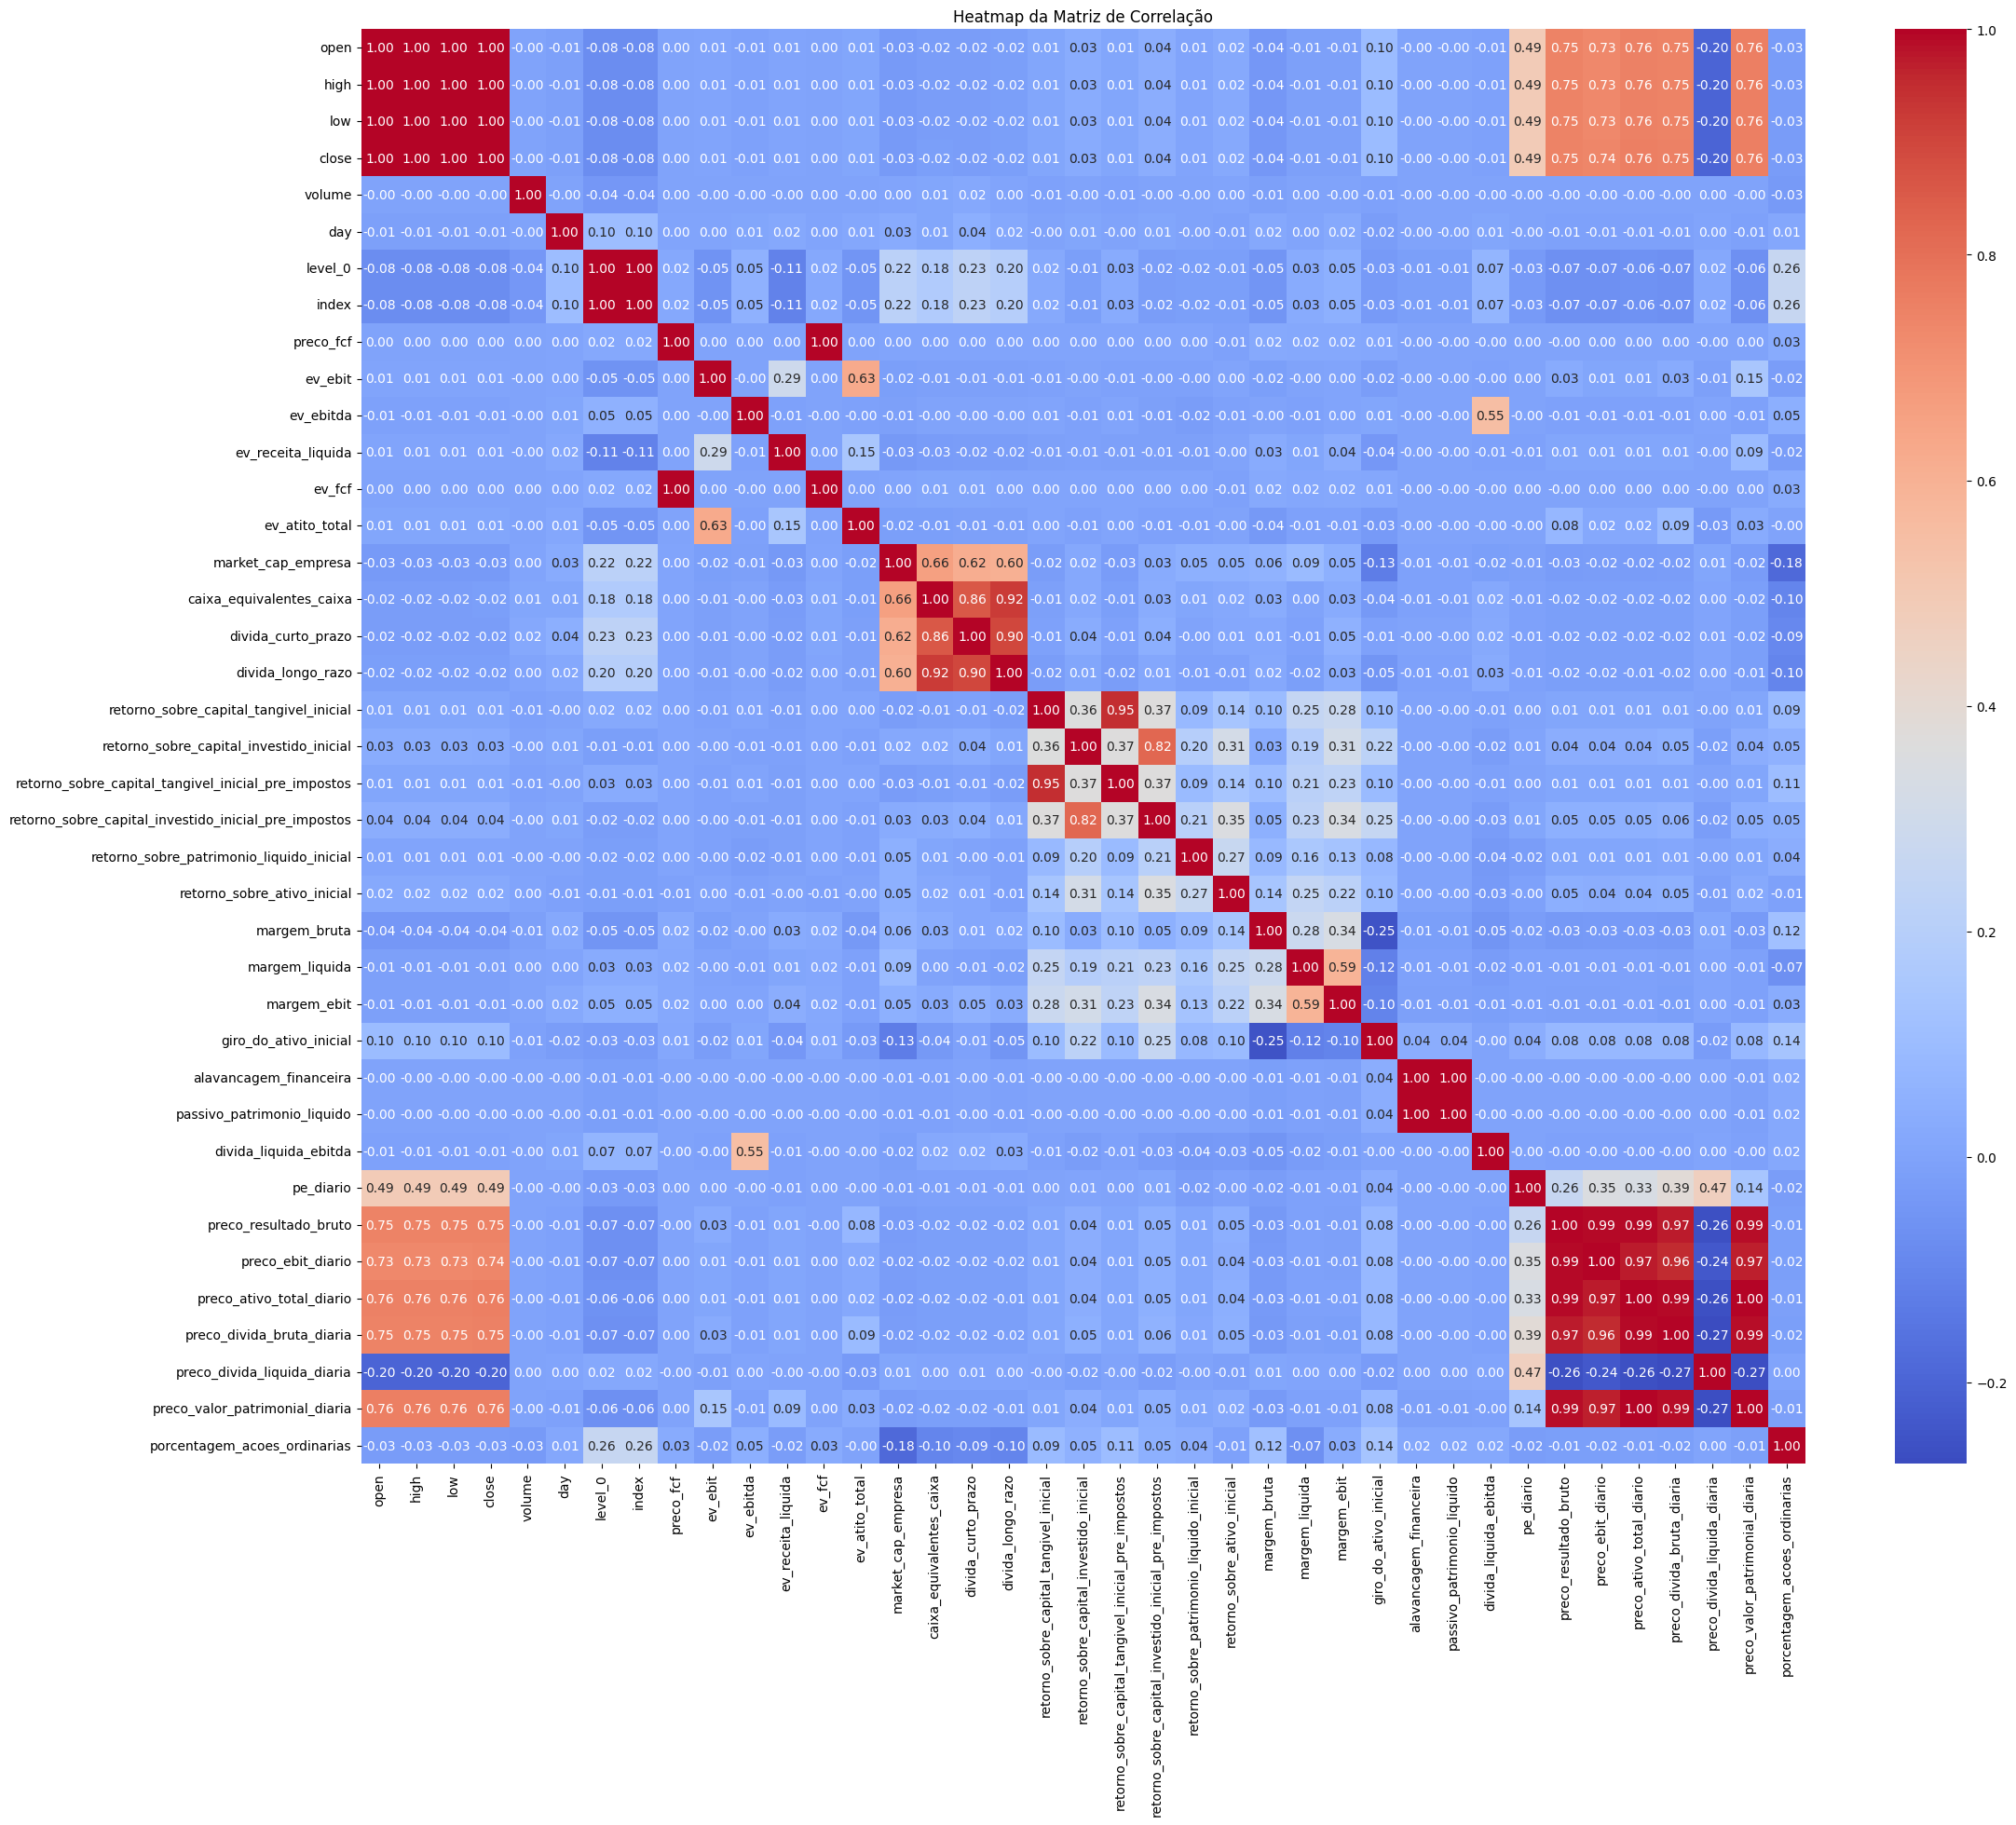

In [503]:
# Calculando a matriz de correlação
correlation_matrix = df_completo.iloc[:, 2:].corr()

# Criando o heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap da Matriz de Correlação')
#plt.savefig('heatmap.png', dpi=600)
plt.show()

## Random forest

In [504]:
from sklearn.ensemble import RandomForestRegressor

**Treinando o modelo**

In [505]:
model = RandomForestRegressor()
# Treina o modelo com seus dados
model.fit(df_x_categorical_scaler, df_y_categorical)

RandomForestRegressor()

**Criando o dataframe de importancias**

In [506]:
# Obtém a importância das características
feature_importances = model.feature_importances_

# Cria um DataFrame para visualizar as importâncias das características
importance_df = pd.DataFrame({'Feature': df_x_categorical.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

**Criando o grafico**

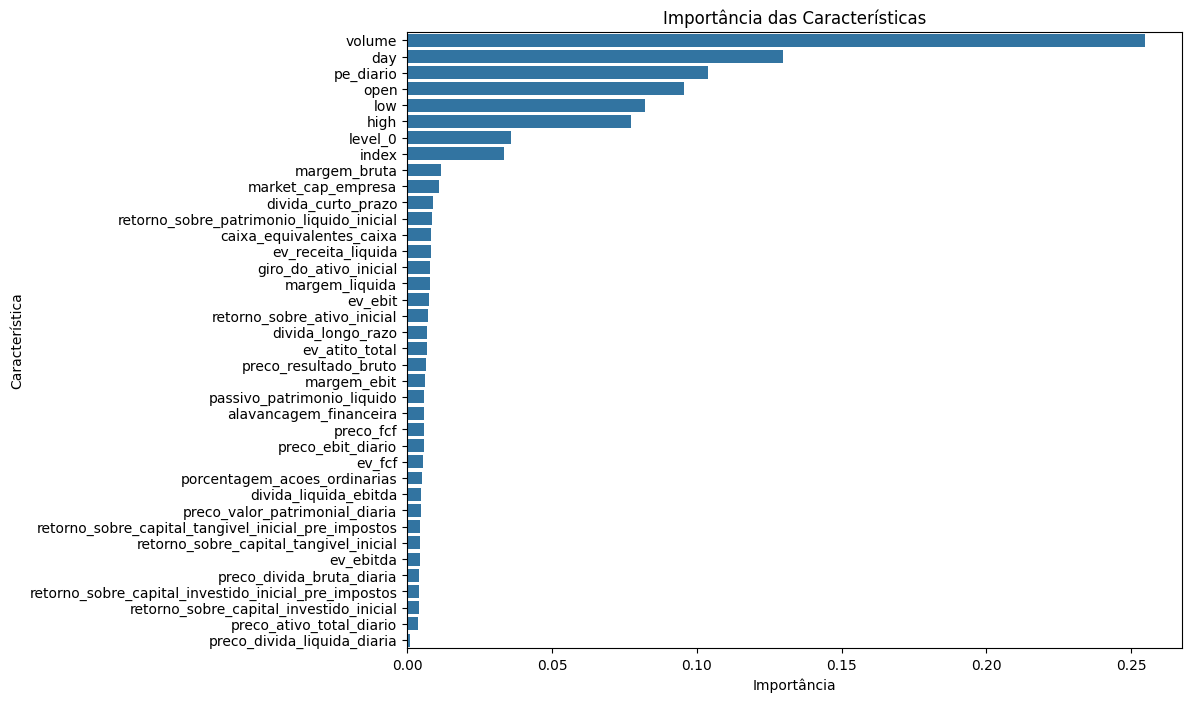

In [507]:
# Plota um gráfico de barras para visualizar as importâncias
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importância das Características')
plt.xlabel('Importância')
plt.ylabel('Característica')
plt.show()

## [Shap](https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137)
Valores SHAP ( SH apley A dditive ex P lanations) é um método baseado na teoria dos jogos cooperativos e usado para aumentar a transparência e a interpretabilidade dos modelos de aprendizado de máquina.

In [289]:
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


**selecionando uma amostra para o shap**

Dados sao muito grandea e demorara muito

In [508]:
nome_tics = df_completo.tic.unique()
lista_reduzida = []
for i in nome_tics:
    lista_reduzida.append(df_completo[df_completo.tic == i].sample(n=500, replace=False))
df_amostra = pd.concat(lista_reduzida).sort_values(['tic','data']).set_index(['tic','data'])

In [509]:
print('Data frame de amostra',df_amostra.shape,'Data frame horiginal',df_x_categorical.shape)

Data frame de amostra (29000, 39) Data frame horiginal (499612, 38)


**Separando treino e teste**

In [510]:
df_y_shape = df_amostra.close
df_x_shape = df_amostra.drop(['close'],axis=1)

In [511]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499612 entries, 51 to 499603
Data columns (total 41 columns):
 #   Column                                                Non-Null Count   Dtype         
---  ------                                                --------------   -----         
 0   data                                                  499612 non-null  datetime64[ns]
 1   tic                                                   499612 non-null  object        
 2   open                                                  499612 non-null  float64       
 3   high                                                  499612 non-null  float64       
 4   low                                                   499612 non-null  float64       
 5   close                                                 499612 non-null  float64       
 6   volume                                                499612 non-null  float64       
 7   day                                                   499612 non-null

In [512]:
df_x_shape.replace([np.inf, -np.inf], 0,inplace=True)

In [513]:
df_x_shape = df_x_shape.fillna(method='ffill')

**Treinando o modelo**

In [514]:
# Treina o modelo com seus dados
model.fit(df_x_shape, df_y_shape)

RandomForestRegressor()

In [515]:
# Fits the explainer
explainer = shap.Explainer(model.predict, df_x_shape)

In [517]:
shap_values = explainer(df_x_shape)

PermutationExplainer explainer: 29001it [6:54:18,  1.17it/s]                             


**Salvando o resultado do shap**

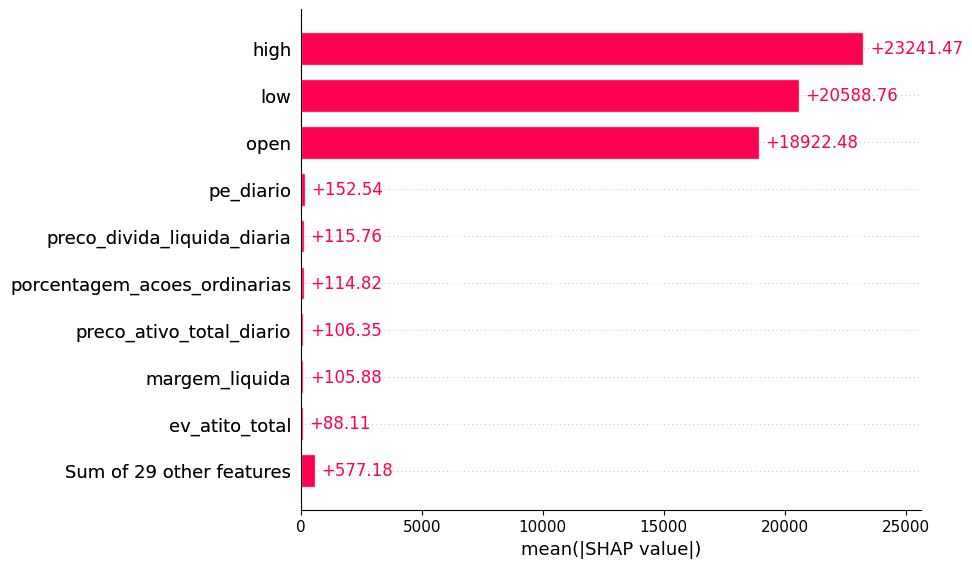

In [519]:
shap.plots.bar(shap_values)

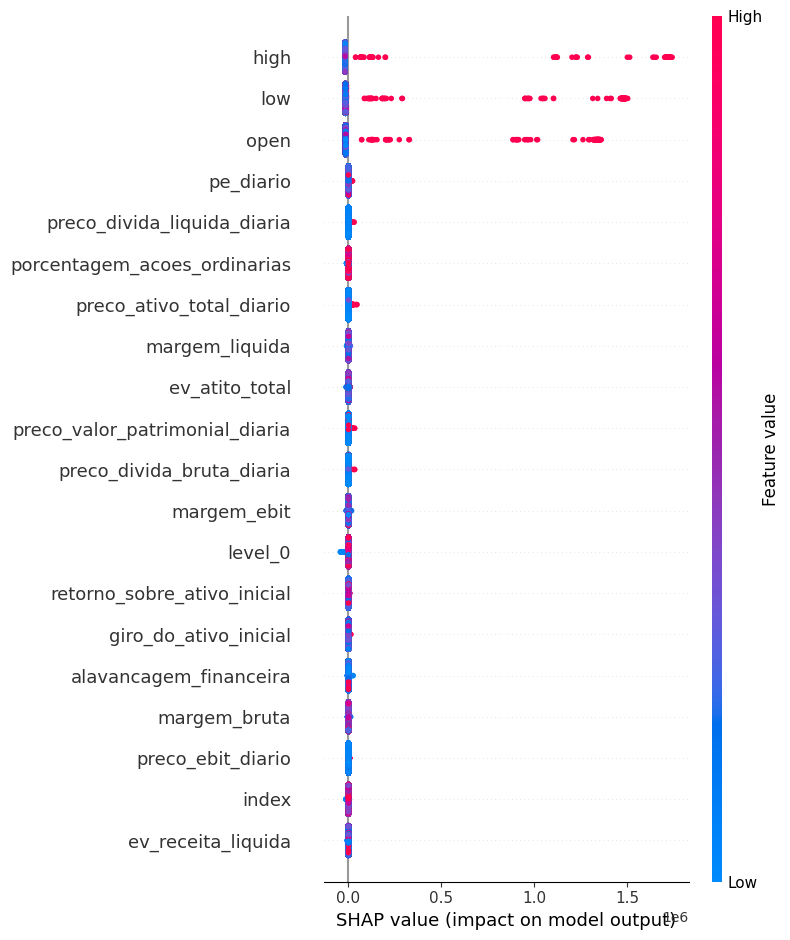

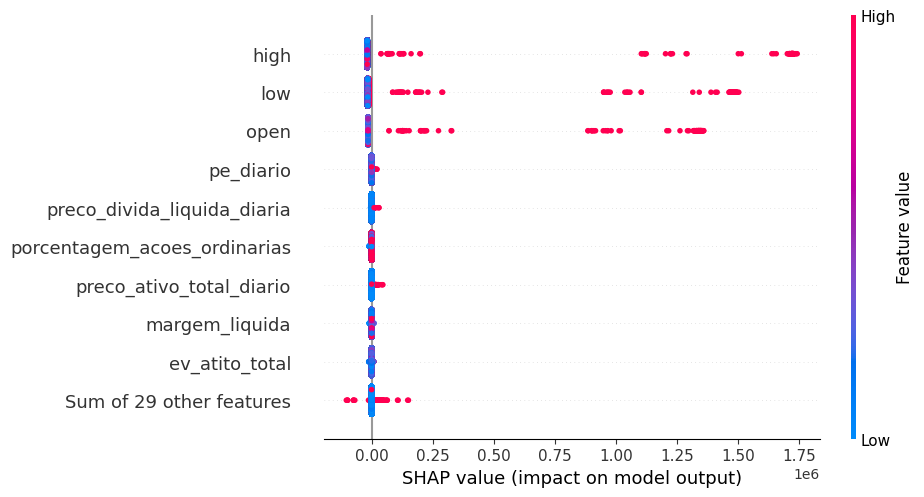

In [523]:
shap.summary_plot(shap_values) 
# ou 
shap.plots.beeswarm(shap_values)

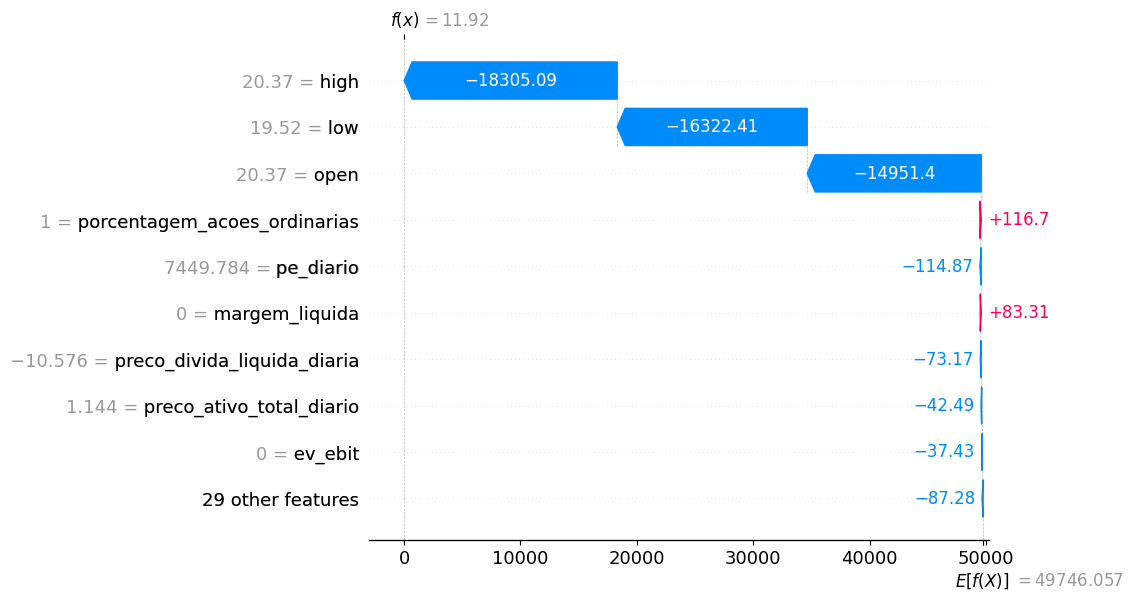

In [536]:
shap.plots.waterfall(shap_values[0])

In [543]:
shap.plots.force(shap_values[0])

In [524]:
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

In [525]:
print_feature_importances_shap_values(shap_values,df_x_shape)

high -> 23241.4748 (softmax = 1.0000)
low -> 20588.7602 (softmax = 0.0000)
open -> 18922.4840 (softmax = 0.0000)
pe_diario -> 152.5423 (softmax = 0.0000)
preco_divida_liquida_diaria -> 115.7628 (softmax = 0.0000)
porcentagem_acoes_ordinarias -> 114.8245 (softmax = 0.0000)
preco_ativo_total_diario -> 106.3465 (softmax = 0.0000)
margem_liquida -> 105.8848 (softmax = 0.0000)
ev_atito_total -> 88.1089 (softmax = 0.0000)
preco_valor_patrimonial_diaria -> 63.0183 (softmax = 0.0000)
preco_divida_bruta_diaria -> 62.2790 (softmax = 0.0000)
margem_ebit -> 58.0149 (softmax = 0.0000)
level_0 -> 51.7557 (softmax = 0.0000)
retorno_sobre_ativo_inicial -> 46.9159 (softmax = 0.0000)
giro_do_ativo_inicial -> 44.6235 (softmax = 0.0000)
alavancagem_financeira -> 38.7401 (softmax = 0.0000)
margem_bruta -> 30.5813 (softmax = 0.0000)
preco_ebit_diario -> 22.4929 (softmax = 0.0000)
index -> 21.2387 (softmax = 0.0000)
ev_receita_liquida -> 16.7543 (softmax = 0.0000)
preco_resultado_bruto -> 14.0178 (softmax = 

In [527]:
type(shap_values)

shap._explanation.Explanation

# Selecionando colunas importantes e salvando os dados

In [104]:
df_completo = data_completo.drop(['ev_ebitda','divida_liquida_ebitda','retorno_sobre_capital_investido_inicial','ev_fcf'],axis=1)

In [106]:
diretorio = 'C:/Users/jefer/Documents/Aprendizado_reforco_trading/Finrl/Finrl_fundamentalist_trader/dados_ibovespa.h5'

In [107]:
df_completo.to_hdf(diretorio,'dados_fundamentalistas.csv')

C:\Users\jefer\anaconda3\envs\testes_finrl\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'dados_fundamentalistas.csv'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
